In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:
df = pd.read_csv("processed_fraud_data.csv")

In [9]:
df = df.drop("AmountBin", axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Time          283726 non-null  float64
 1   V1            283726 non-null  float64
 2   V2            283726 non-null  float64
 3   V3            283726 non-null  float64
 4   V4            283726 non-null  float64
 5   V5            283726 non-null  float64
 6   V6            283726 non-null  float64
 7   V7            283726 non-null  float64
 8   V8            283726 non-null  float64
 9   V9            283726 non-null  float64
 10  V10           283726 non-null  float64
 11  V11           283726 non-null  float64
 12  V12           283726 non-null  float64
 13  V13           283726 non-null  float64
 14  V14           283726 non-null  float64
 15  V15           283726 non-null  float64
 16  V16           283726 non-null  float64
 17  V17           283726 non-null  float64
 18  V18 

In [12]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y,random_state=42)

In [14]:
rf = RandomForestClassifier(n_estimators=200,class_weight="balanced",random_state=42,n_jobs=-1)

In [15]:
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.69      0.81        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [19]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[56649     2]
 [   29    66]]


In [20]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.9339774742676535


In [23]:
y_predo = (y_prob > 0.3).astype(int)

In [26]:
print(classification_report(y_test, y_predo))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [27]:
confusion_matrix(y_test, y_predo)

array([[56648,     3],
       [   26,    69]])

In [29]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

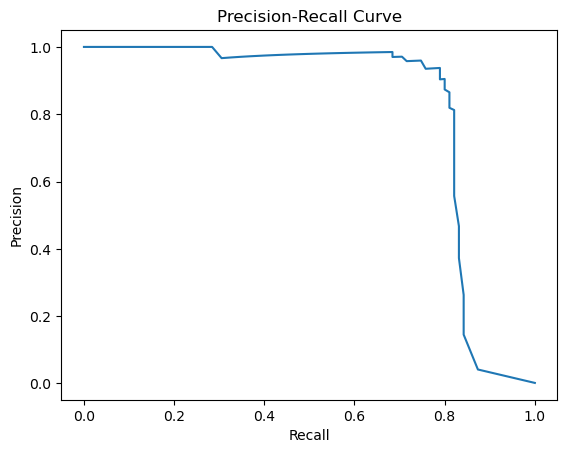

In [30]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [31]:
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print("Best Threshold:", best_threshold)
print("Best F1 Score:", f1_scores[best_index])
print("Precision at best:", precision[best_index])
print("Recall at best:", recall[best_index])

Best Threshold: 0.175
Best F1 Score: 0.8571428570932246
Precision at best: 0.9375
Recall at best: 0.7894736842105263
